In [2]:
from adapters import ConfigUnion, PrefixTuningConfig, SeqBnConfig, LoRAConfig, MAMConfig, BnConfig, UniPELTConfig


models_to_test = ["nickmuchi/sec-bert-finetuned-finance-classification", "ProsusAI/finbert", "ahmedrachid/FinancialBERT-Sentiment-Analysis", "yiyanghkust/finbert-tone", "nickmuchi/deberta-v3-base-finetuned-finance-text-classification", "soleimanian/financial-roberta-large-sentiment", "bardsai/finance-sentiment-pl-fast", "RashidNLP/Finance-Sentiment-Classification", "siebert/sentiment-roberta-large-english", "kwang123/bert-sentiment-analysis", "distilbert/distilbert-base-uncased-finetuned-sst-2-english"]

adapter_config_list = [LoRAConfig(), UniPELTConfig(), MAMConfig(), ConfigUnion(LoRAConfig(r=8, use_gating=True), PrefixTuningConfig(prefix_length=10, use_gating=True), SeqBnConfig(reduction_factor=16, use_gating=True)), ]

In [3]:
import pandas as pd
from build_model import CustomTransformerModel
from evaluate_model import ModelEvaluator

#stop warnings
import warnings
warnings.filterwarnings('ignore')

# Load the training and evaluation data

# List of [model_name, adapter_name, column_name] combinations
combinations = [
    ["bardsai/finance-sentiment-pl-fast", True, 'AnalystNoteList', adapter_config_list[0]]
    # Add more combinations as needed
]

# Load the training and evaluation data
train_df = pd.read_csv('1. data/final/train.csv')
dev_df = pd.read_csv('1. data/final/dev.csv')
test_df = pd.read_csv('1. data/final/test.csv')


for model_name, adapter, column_name, adapter_config in combinations:
    # Create an instance of CustomTransformerModel
    model = CustomTransformerModel(model_name=model_name, adapter=adapter, column_name=column_name, adapter_config=adapter_config)

    # Build the model
    model.build_model()

    # Train the model
    model.train(train_df, dev_df, test_df, epochs=1, batch_size=8, learning_rate=2e-2, seed=42, save_model=False)




100%|██████████| 138/138 [02:48<00:00,  1.22s/it]


{'train_runtime': 168.4103, 'train_samples_per_second': 6.549, 'train_steps_per_second': 0.819, 'train_loss': 1.388823136039402, 'epoch': 1.0}


100%|██████████| 40/40 [00:20<00:00,  1.95it/s]


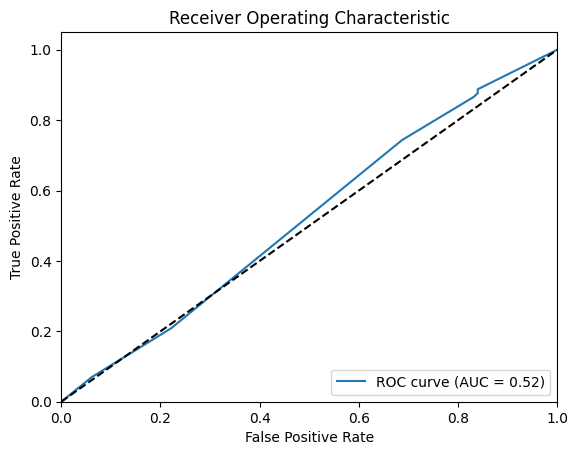

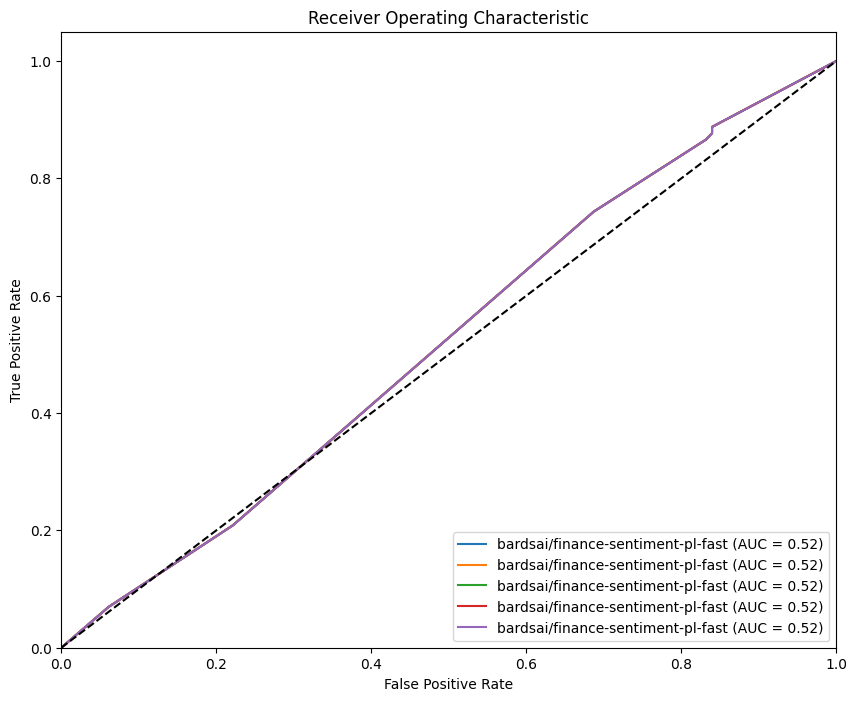

In [4]:
import pandas as pd
from adapters import ConfigUnion, PrefixTuningConfig, SeqBnConfig, LoRAConfig, MAMConfig, BnConfig, UniPELTConfig

from evaluate_model import ModelEvaluator

models_to_test = ["nickmuchi/sec-bert-finetuned-finance-classification", "ProsusAI/finbert", "ahmedrachid/FinancialBERT-Sentiment-Analysis", "yiyanghkust/finbert-tone", "nickmuchi/deberta-v3-base-finetuned-finance-text-classification", "soleimanian/financial-roberta-large-sentiment", "bardsai/finance-sentiment-pl-fast", "RashidNLP/Finance-Sentiment-Classification", "siebert/sentiment-roberta-large-english", "kwang123/bert-sentiment-analysis", "distilbert/distilbert-base-uncased-finetuned-sst-2-english"]

# List of [model_name, adapter_name, column_name] combinations
combinations = [
    ["bardsai/finance-sentiment-pl-fast", True, 'AnalystNoteList', adapter_config_list[0]]
    # Add more combinations as needed
]
adapter_config_list = [LoRAConfig(), UniPELTConfig(), MAMConfig(), ConfigUnion(LoRAConfig(r=8, use_gating=True), PrefixTuningConfig(prefix_length=10, use_gating=True), SeqBnConfig(reduction_factor=16, use_gating=True)), ]

test_df = pd.read_csv('1. data/final/test.csv')
true_labels = test_df['Label']

# Create an instance of ModelEvaluator
evaluator = ModelEvaluator(true_labels, combinations)

# Evaluate the models
evaluator.evaluate()
evaluator.build_roc_curve(5)
